In [28]:
#读取数据
from sklearn.externals.joblib import Memory  
from sklearn.datasets import load_svmlight_file 
import numpy as np

def get_data():
    data = load_svmlight_file("housing_scale")
    return data[0],data[1]

data_x,data_y = get_data()

In [29]:
#切分数据
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(data_x,data_y,test_size=0.33,random_state=42) 

y_train = np.mat(y_train).T
y_valid = np.mat(y_valid).T

In [30]:
#初始化线性模型参数
w = np.mat(np.random.random([14,1]))

Loss of Training set after the last interation:   12.7923037633
Loss of Validation set after the last interation: 12.2776344044


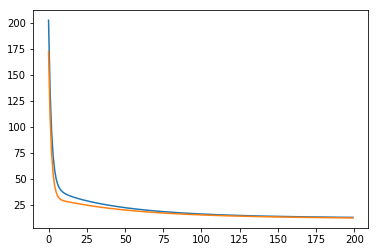

In [31]:
from scipy import sparse 
import matplotlib.pyplot as plt

m_train = x_train.shape[0]    #训练数量
m_valid = x_valid.shape[0]    #验证数量

x_1_train = np.ones((m_train,1),dtype='float64')   #创造 [1,1,……,1]^T
X_train = sparse.hstack((x_train,x_1_train))       #归并 x_train 和 [1,1,……,1]^T

x_1_valid = np.ones((x_valid.shape[0],1),dtype='float64')    #创造 [1,1,……,1]^T
X_valid = sparse.hstack((x_valid,x_1_valid))                 #归并 x_valid 和 [1,1,……,1]^T

Loss_train = []    #Loss_train-axis
Loss_valid = []    #Loss_valid-axis
x = []             #x-axis:迭代次数

for n in range(0,200):    #重复200次
    
    #求得所有样本对Loss函数的梯度G
    G = (1/m_train)*((-X_train.T * y_train) + (X_train.T * X_train * w)) 

    D = -G                  #取梯度G的负方向，记为D

    learn_rate = 0.05       #Learning rate

    w = w + learn_rate*D    #更新模型参数

    x.append(n)             #更新 x-axis
    
    #在训练集上测试并得到Loss函数值
    Loss_train.append( ( 1/(2*m_train) * (y_train-X_train*w).T * (y_train-X_train*w) )[0,0])
    Loss_valid.append( ( 1/(2*m_valid) * (y_valid-X_valid*w).T * (y_valid-X_valid*w) )[0,0])

#画出Loss_train 和Loss_valid随迭代次数的变化图
plt.plot(x, Loss_train)
plt.plot(x, Loss_valid)

#最后一次迭代后的Loss 
print("Loss of Training set after the last interation:   "+str(Loss_train[199])
      +"\nLoss of Validation set after the last interation: "+str(Loss_valid[199]))


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import sparse 

x_train,x_valid,y_train,y_valid = train_test_split(data_x,data_y,test_size=0.33,random_state=42)

linreg = LinearRegression()
model=linreg.fit(x_train, y_train)
print (model)
linreg.intercept_ = np.mat(linreg.intercept_)
linreg.coef_ = np.mat(linreg.coef_)
w = sparse.vstack((linreg.coef_.T,linreg.intercept_))

y_train = np.mat(y_train).T
y_valid = np.mat(y_valid).T


x_1_train = np.ones((x_train.shape[0],1),dtype='float64')
X_train = sparse.hstack((x_train,x_1_train))

x_1_valid = np.ones((x_valid.shape[0],1),dtype='float64')
X_valid = sparse.hstack((x_valid,x_1_valid))

Loss_train = 1/(2*m_train) * np.mat((y_train- X_train*w).T) * (y_train- X_train*w)
Loss_valid =1/(2*m_valid) * np.mat((y_valid- X_valid*w).T) * (y_valid- X_valid*w)
print(Loss_train)
print(Loss_valid)
print(w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[[ 12.63417379]]
[[ 11.4909405]]
  (0, 0)	4.16589803005
  (1, 0)	2.23984360281
  (2, 0)	1.48082064496
  (3, 0)	2.48749811895
  (4, 0)	-2.30264763975
  (5, 0)	10.798580652
  (6, 0)	-1.07796043905
  (7, 0)	-5.30305350053
  (8, 0)	1.53161468748
  (9, 0)	-2.86872863665
  (10, 0)	-4.12754347534
  (11, 0)	1.77999406903
  (12, 0)	-9.47903712619
  (13, 0)	22.9707964602
